In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [9]:
ELECTION_DATA_DIR = "../data/election_data"
RAW_ELECTION_DATA_DIR = f"{ELECTION_DATA_DIR}/raw"
PROCESSED_ELECTION_DATA_DIR = f"{ELECTION_DATA_DIR}/processed"


In [17]:
result_filepaths = [
    f"{PROCESSED_ELECTION_DATA_DIR}/simplified_europeennes_2024_t1_burvot.tsv",
    f"{PROCESSED_ELECTION_DATA_DIR}/simplified_presidentielle_2022_t1_burvot.tsv"
]


In [18]:
dfs = []
suffixes = []

for i, result_filepath in enumerate(result_filepaths):
    df = pd.read_csv(result_filepath, sep="\t")
    election_type = result_filepath.split("/")[-1].split("_")[1][:4]
    year = result_filepath.split("/")[-1].split("_")[2][2:]
    tour = result_filepath.split("/")[-1].split("_")[3]
    suffix = f"__{election_type}-{year}-{tour}"
    df['bv_uid'] = df.apply(lambda row: '-'.join([str(row['code_departement']), str(row['code_commune']), str(row['code_bvote'])]),axis=1)
    df.set_index('bv_uid',inplace=True)
    df = df.add_suffix(suffix)
    suffixes.append(suffix)
    dfs.append(df)


/var/folders/qj/sqd5wwv14kg17__2ryky852r0000gn/T/ipykernel_65060/2908872676.py:5: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(result_filepath, sep="\t")


In [19]:
# we merge the files
df = pd.merge(dfs[0], dfs[1], on="bv_uid", how="inner", suffixes=('', '__dup_'))

In [22]:
dfs[0]

,code_localisation__euro-24-t1,lib_localisation__euro-24-t1,code_departement__euro-24-t1,lib_departement__euro-24-t1,code_commune__euro-24-t1,lib_commune__euro-24-t1,code_bvote__euro-24-t1,inscrits__euro-24-t1,votants__euro-24-t1,perc_participation__euro-24-t1,...,perc_abstention__euro-24-t1,exprimes__euro-24-t1,exprimes_perc_inscrits__euro-24-t1,exprimes_perc_votants__euro-24-t1,blancs__euro-24-t1,blancs_perc_inscrits__euro-24-t1,blancs_perc_votants__euro-24-t1,nuls__euro-24-t1,nuls_perc_inscrits__euro-24-t1,nuls_perc_votants__euro-24-t1
bv_uid,,,,,,,,,,,,,,,,,,,,,
nan-nan-nan,Code localisation.LibellÃ© localisation.Code d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan-nan-nan,FE.France entiÃšre.1.Ain.1001.L'Abergement-ClÃ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan-nan-nan,FE.France entiÃšre.1.Ain.1002.L'Abergement-de-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan-nan-nan,FE.France entiÃšre.1.Ain.1004.AmbÃ©rieu-en-Bug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan-nan-nan,FE.France entiÃšre.1.Ain.1004.AmbÃ©rieu-en-Bug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan-nan-nan,FE.France entiÃšre.ZZ.FranÃ§ais Ã©tablis hors ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan-nan-nan,FE.France entiÃšre.ZZ.FranÃ§ais Ã©tablis hors ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nan-nan-nan,FE.France entiÃšre.ZZ.FranÃ§ais Ã©tablis hors ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# remove français de l'étranger
df = df[~df[f"code_departement{suffixes[0]}"].str.contains("Z", na=False)]

AttributeError: Can only use .str accessor with string values!

In [ ]:
# order columns in approximate order of result
cols_to_keep = []
for suffix in set(suffixes): # the set bit is so that we don't have duplicate columns if we compare the same results
    sums = df[[col for col in df.columns if "cd__" in col and suffix in col]].sum()
    cols_to_keep += sums.sort_values(ascending=False).index.tolist()
df = df[cols_to_keep]

In [ ]:
corr_matrix = df[[col for col in df.columns if "cd__" in col]].corr()
corr_matrix = corr_matrix.reindex([col for col in df.columns if suffixes[0] in col and "cd__" in col and "__dup_" not in col])[[col for col in df.columns if suffixes[1] in col and "cd__" in col and "__dup_" not in col]]

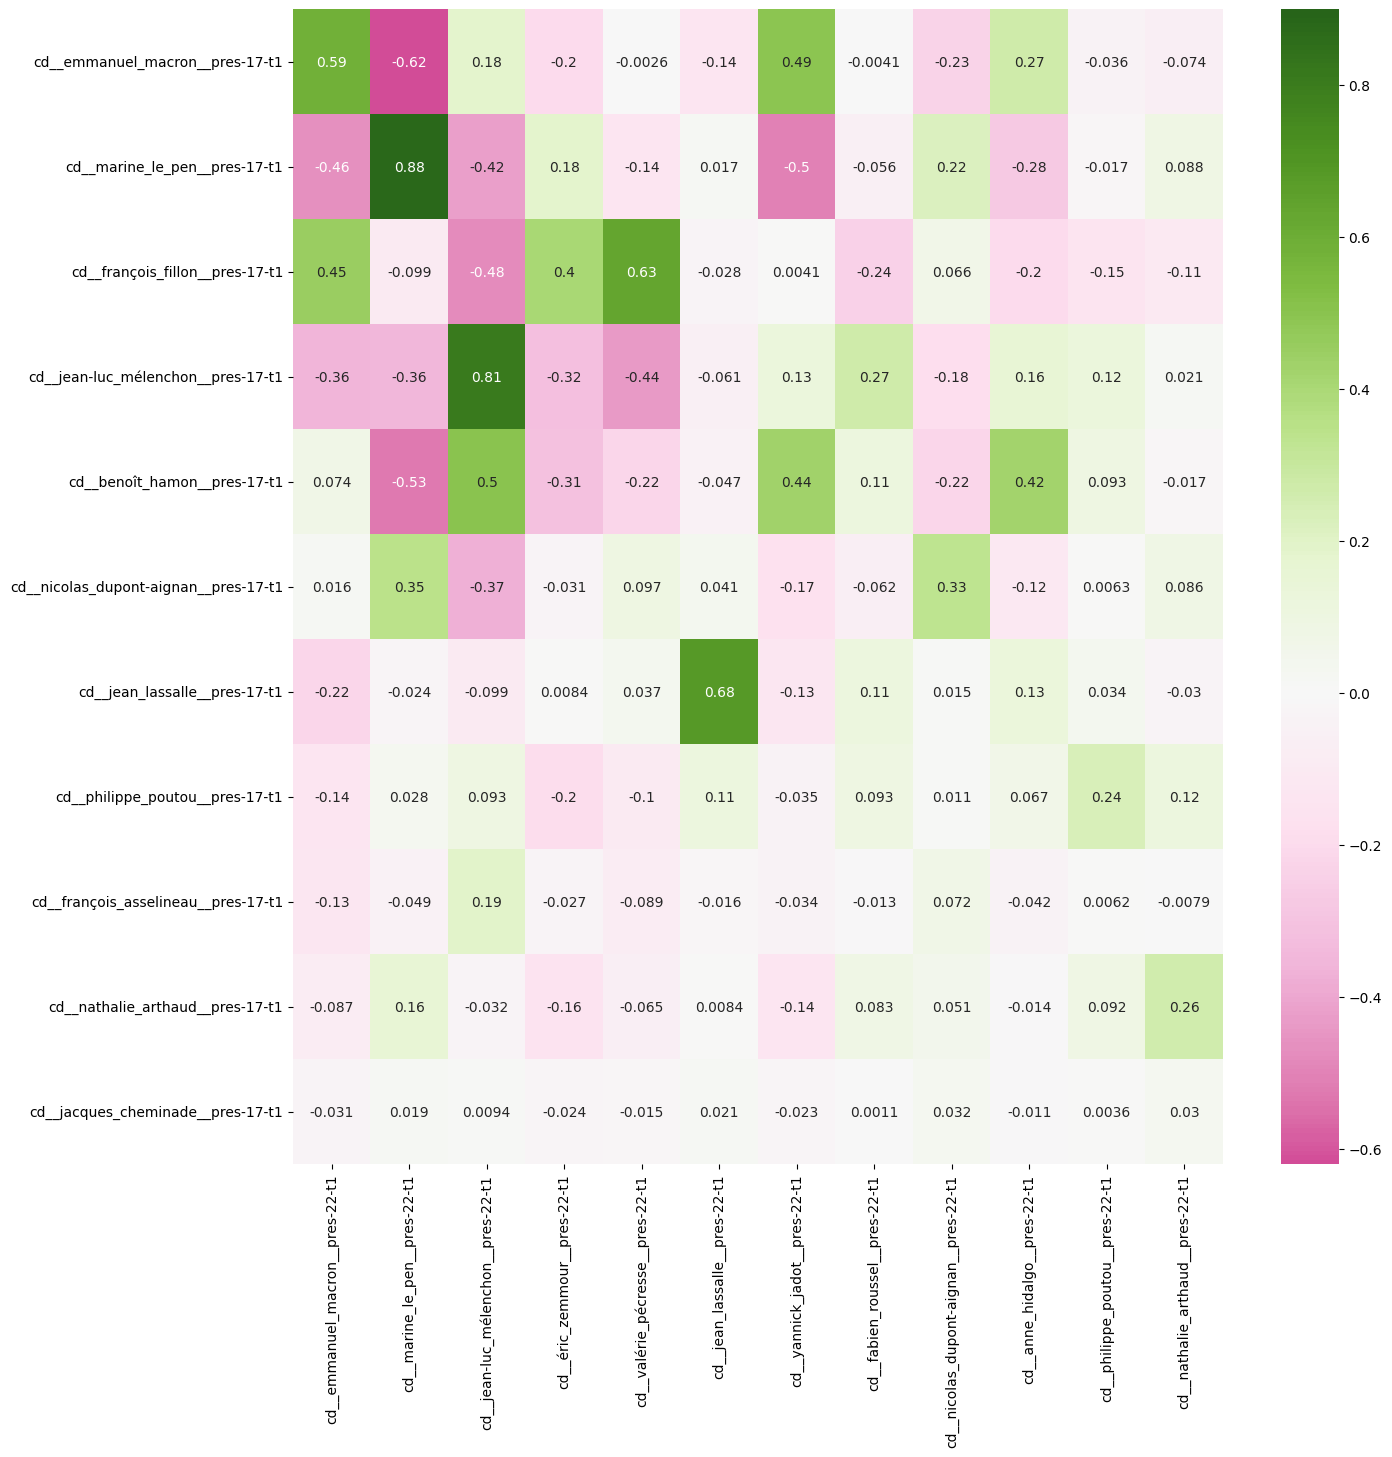

In [ ]:
plt.figure(figsize=(15,15))
sn.heatmap(corr_matrix, annot=True, cmap='PiYG', center=0, vmin=corr_matrix.min().min(), vmax=0.9)
plt.show()